In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [19]:
df = pd.read_csv('datasets_Life Expectancy Data_No_blanks.csv')
df.head(20)
dataset =  df
print(dataset.values)


[['Afghanistan' 2015 'Developing' ... 17.3 0.479 10.1]
 ['Afghanistan' 2014 'Developing' ... 17.5 0.47600000000000003 10.0]
 ['Afghanistan' 2013 'Developing' ... 17.7 0.47 9.9]
 ...
 ['Zimbabwe' 2002 'Developing' ... 1.3 0.42700000000000005 10.0]
 ['Zimbabwe' 2001 'Developing' ... 1.7 0.42700000000000005 9.8]
 ['Zimbabwe' 2000 'Developing' ... 11.2 0.434 9.8]]


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
#X = np.array(ct.fit_transform(df), dtype= object)
#print(X)
df["Country"]= df["Country"].astype('category')
df.dtypes
df["Status"]= df["Status"].astype('category')
df.dtypes
df["Country"]= df["Country"].cat.codes
df["Status"]= df["Status"].cat.codes
#for i in range(20,60,1):
#    print(df.iloc[i,[0,22]],df.iloc[i,[2,23]])
#print(df.iloc[0:20,[0,22]],'\n\n',df.iloc[0:20,[2,23]])

In [21]:
df.describe()

Country         Year       Status  Life expectancy   \
count  1601.000000  1601.000000  1601.000000       1601.000000   
mean     66.148657  2007.960650     0.848844         69.391630   
std      38.683642     4.061598     0.358312          8.876531   
min       0.000000  2000.000000     0.000000         44.000000   
25%      33.000000  2005.000000     1.000000         64.600000   
50%      67.000000  2008.000000     1.000000         71.800000   
75%     100.000000  2011.000000     1.000000         75.000000   
max     132.000000  2015.000000     1.000000         89.000000   

       Adult Mortality  infant deaths      Alcohol  percentage expenditure  \
count      1601.000000    1601.000000  1601.000000             1601.000000   
mean        167.592130      33.461587     4.623260              715.376178   
std         126.032532     122.529894     4.046706             1782.549852   
min           1.000000       0.000000     0.010000                0.000000   
25%          76.000000       1.000000     0.870000               38.427908   
50%         147.000000       3.000000     3.940000              149.480209   
75%         225.000000      23.000000     7.410000              526.378064   
max         723.000000    1600.000000    17.870000            18961.348600   

       Hepatitis B       Measles   ...        Polio  Total expenditure  \
count  1601.000000    1601.000000  ...  1601.000000        1601.000000   
mean     79.296065    2288.655840  ...    83.687695           5.987995   
std      25.582436   10229.009962  ...    22.378531           2.286342   
min       2.000000       0.000000  ...     3.000000           0.740000   
25%      75.000000       0.000000  ...    81.000000           4.460000   
50%      91.000000      15.000000  ...    93.000000           5.860000   
75%      96.000000     394.000000  ...    97.000000           7.470000   
max      99.000000  131441.000000  ...    99.000000          14.390000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  1601.000000  1601.000000    1601.000000  1.601000e+03   
mean     84.465334     2.034916    5682.787714  1.505792e+07   
std      21.153905     6.114317   11622.097831  7.146963e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      82.000000     0.100000     464.184650  2.148660e+05   
50%      93.000000     0.100000    1642.837974  1.457295e+06   
75%      97.000000     0.700000    4792.652880  8.177693e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            1601.000000          1601.000000   
mean                4.786821             4.840725   
std                 4.518185             4.560669   
min                 0.100000             0.100000   
25%                 1.600000             1.600000   
50%                 3.000000             3.100000   
75%                 7.000000             7.100000   
max                27.200000            28.200000   

       Income composition of resources    Schooling  
count                      1601.000000  1601.000000  
mean                          0.650486    12.171143  
std                           0.149006     2.788580  
min                           0.279000     4.200000  
25%                           0.529000    10.400000  
50%                           0.677000    12.300000  
75%                           0.754000    14.000000  
max                           0.936000    20.700000  

[8 rows x 22 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
Country                            1601 non-null int16
Year                               1601 non-null int64
Status                             1601 non-null int8
Life expectancy                    1601 non-null float64
Adult Mortality                    1601 non-null int64
infant deaths                      1601 non-null int64
Alcohol                            1601 non-null float64
percentage expenditure             1601 non-null float64
Hepatitis B                        1601 non-null int64
Measles                            1601 non-null int64
 BMI                               1601 non-null float64
under-five deaths                  1601 non-null int64
Polio                              1601 non-null int64
Total expenditure                  1601 non-null float64
Diphtheria                         1601 non-null int64
 HIV/AIDS                          1601 non-null float64
GD

In [23]:
X=dataset.iloc[:,2:]
y=dataset.iloc[:,3]
print (X)



      Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0          1              65.0              263             62     0.01   
1          1              59.9              271             64     0.01   
2          1              59.9              268             66     0.01   
3          1              59.5              272             69     0.01   
4          1              59.2              275             71     0.01   
...      ...               ...              ...            ...      ...   
1596       1              44.3              723             27     4.36   
1597       1              44.5              715             26     4.06   
1598       1              44.8               73             25     4.43   
1599       1              45.3              686             25     1.72   
1600       1              46.0              665             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         

In [24]:

from sklearn.preprocessing import MinMaxScaler

x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

print(df)

        0         1         2         3         4         5         6  \
0     1.0  0.466667  0.362881  0.038750  0.000000  0.003759  0.649485   
1     1.0  0.353333  0.373961  0.040000  0.000000  0.003878  0.618557   
2     1.0  0.353333  0.369806  0.041250  0.000000  0.003861  0.639175   
3     1.0  0.344444  0.375346  0.043125  0.000000  0.004123  0.670103   
4     1.0  0.337778  0.379501  0.044375  0.000000  0.000374  0.680412   
...   ...       ...       ...       ...       ...       ...       ...   
1596  1.0  0.006667  1.000000  0.016875  0.243561  0.000000  0.680412   
1597  1.0  0.011111  0.988920  0.016250  0.226764  0.000000  0.051546   
1598  1.0  0.017778  0.099723  0.015625  0.247480  0.000000  0.731959   
1599  1.0  0.028889  0.948753  0.015625  0.095745  0.000000  0.762887   
1600  1.0  0.044444  0.919668  0.015000  0.093505  0.000000  0.793814   

             7         8         9        10        11        12        13  \
0     0.008780  0.227696  0.039524  0.031250 

In [46]:
# What is the correlation between variables?

correlation=X.corr(method='pearson')
print(correlation)

                                   Status  Life expectancy   Adult Mortality  \
Status                           1.000000         -0.442261         0.279336   
Life expectancy                 -0.442261          1.000000        -0.702675   
Adult Mortality                  0.279336         -0.702675         1.000000   
infant deaths                    0.112272         -0.172593         0.043960   
Alcohol                         -0.606356          0.398834        -0.172588   
percentage expenditure          -0.459745          0.408550        -0.237614   
Hepatitis B                     -0.141640          0.207293        -0.114744   
Measles                          0.074846         -0.071493        -0.002847   
 BMI                            -0.300888          0.547554        -0.354821   
under-five deaths                0.113414         -0.195981         0.062067   
Polio                           -0.203793          0.335180        -0.208745   
Total expenditure               -0.19110

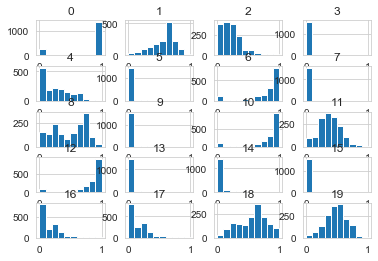

In [48]:
#There are various kinds of visualizations we can try with python..We already 
#saw scatter and line plots.. Lets look at histograms 
#Histograms
from matplotlib import pyplot
df.hist()
pyplot.show()

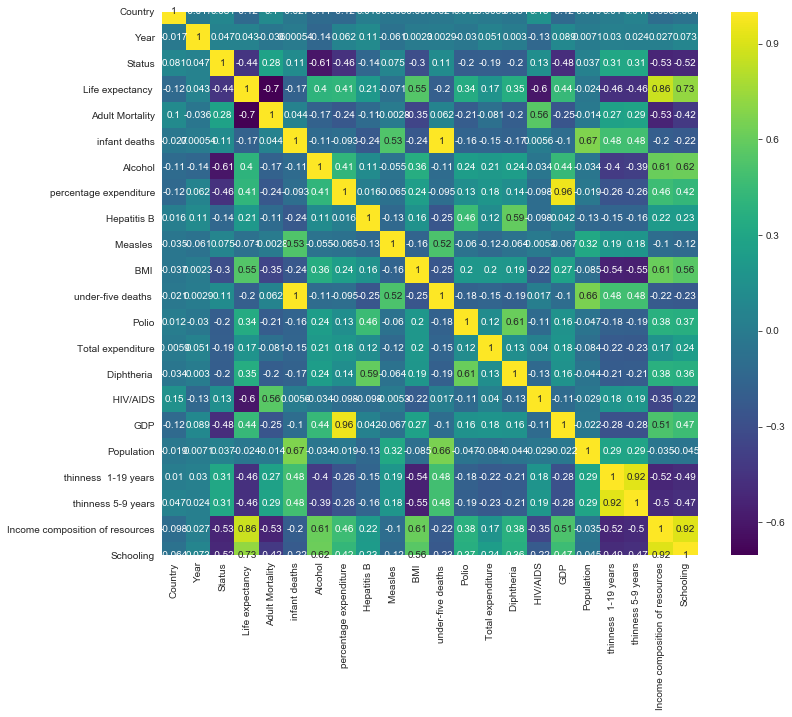

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),cmap='viridis',annot=True)

In [28]:
X.columns

Index(['Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

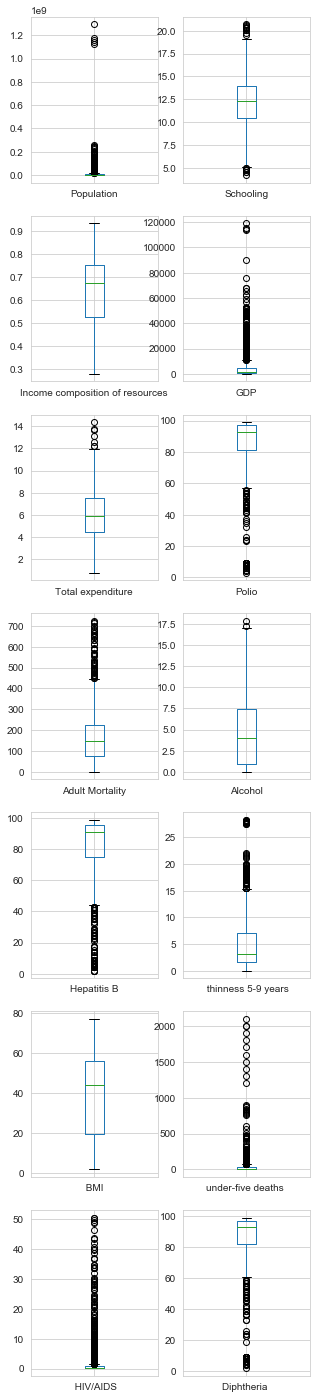

In [31]:
fig, axes = plt.subplots(7,2,figsize=(5,25))
X.boxplot(column='Population', ax=axes[0,0])

X.boxplot(column='Schooling',ax=axes[0,1])

X.boxplot(column='Income composition of resources',ax=axes[1,0])
X.boxplot(column='GDP',ax=axes[1,1])

X.boxplot(column='Total expenditure',ax=axes[2,0])
X.boxplot(column='Polio',ax=axes[2,1])

X.boxplot(column='Adult Mortality',ax=axes[3,0])
X.boxplot(column='Alcohol',ax=axes[3,1])

X.boxplot(column='Hepatitis B',ax=axes[4,0])
X.boxplot(column=' thinness 5-9 years',ax=axes[4,1])

X.boxplot(column=' BMI ',ax=axes[5,0])
X.boxplot(column='under-five deaths ',ax=axes[5,1])

X.boxplot(column=' HIV/AIDS',ax=axes[6,0])
X.boxplot(column='Diphtheria ',ax=axes[6,1])

In [33]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Status                             0.000000e+00
Life expectancy                    1.040000e+01
Adult Mortality                    1.490000e+02
infant deaths                      2.200000e+01
Alcohol                            6.540000e+00
percentage expenditure             4.879502e+02
Hepatitis B                        2.100000e+01
Measles                            3.940000e+02
 BMI                               3.600000e+01
under-five deaths                  3.100000e+01
Polio                              1.600000e+01
Total expenditure                  3.010000e+00
Diphtheria                         1.500000e+01
 HIV/AIDS                          6.000000e-01
GDP                                4.328468e+03
Population                         7.962827e+06
 thinness  1-19 years              5.400000e+00
 thinness 5-9 years                5.500000e+00
Income composition of resources    2.250000e-01
Schooling                          3.600000e+00
dtype: float64


In [34]:
X_clean = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]

In [35]:
X_clean.shape

(564, 20)

In [36]:
X_clean.corr()

Status  Life expectancy   Adult Mortality  \
Status                              NaN               NaN              NaN   
Life expectancy                     NaN          1.000000        -0.513158   
Adult Mortality                     NaN         -0.513158         1.000000   
infant deaths                       NaN         -0.288207         0.185389   
Alcohol                             NaN          0.285047        -0.005294   
percentage expenditure              NaN          0.347406        -0.139110   
Hepatitis B                         NaN          0.195358        -0.164684   
Measles                             NaN         -0.222775         0.085931   
 BMI                                NaN          0.397122        -0.250086   
under-five deaths                   NaN         -0.350545         0.207658   
Polio                               NaN          0.216973        -0.166711   
Total expenditure                   NaN          0.277599        -0.127978   
Diphtheria                          NaN          0.236223        -0.176071   
 HIV/AIDS                           NaN         -0.521732         0.295767   
GDP                                 NaN          0.308490        -0.119594   
Population                          NaN         -0.023600         0.076666   
 thinness  1-19 years               NaN         -0.344625         0.100822   
 thinness 5-9 years                 NaN         -0.338625         0.102240   
Income composition of resources     NaN          0.753944        -0.365117   
Schooling                           NaN          0.592498        -0.298944   

                                 infant deaths   Alcohol  \
Status                                     NaN       NaN   
Life expectancy                      -0.288207  0.285047   
Adult Mortality                       0.185389 -0.005294   
infant deaths                         1.000000 -0.180200   
Alcohol                              -0.180200  1.000000   
percentage expenditure               -0.124015  0.242662   
Hepatitis B                          -0.076396  0.188988   
Measles                               0.231736 -0.121954   
 BMI                                 -0.155111  0.233876   
under-five deaths                     0.987761 -0.194876   
Polio                                -0.101592  0.286335   
Total expenditure                    -0.018968  0.137894   
Diphtheria                           -0.083404  0.295774   
 HIV/AIDS                             0.213063 -0.128246   
GDP                                  -0.124192  0.233903   
Population                            0.297463  0.063449   
 thinness  1-19 years                 0.097250 -0.290762   
 thinness 5-9 years                   0.088195 -0.288825   
Income composition of resources      -0.324933  0.500302   
Schooling                            -0.344983  0.428648   

                                 percentage expenditure  Hepatitis B  \
Status                                              NaN          NaN   
Life expectancy                                0.347406     0.195358   
Adult Mortality                               -0.139110    -0.164684   
infant deaths                                 -0.124015    -0.076396   
Alcohol                                        0.242662     0.188988   
percentage expenditure                         1.000000     0.102123   
Hepatitis B                                    0.102123     1.000000   
Measles                                       -0.135497    -0.089250   
 BMI                                           0.204542     0.009537   
under-five deaths                             -0.145086    -0.099828   
Polio                                          0.066470     0.799395   
Total expenditure                              0.142891     0.098355   
Diphtheria                                     0.083554     0.850090   
 HIV/AIDS                                     -0.201144    -0.213863   
GDP                                            0.8399

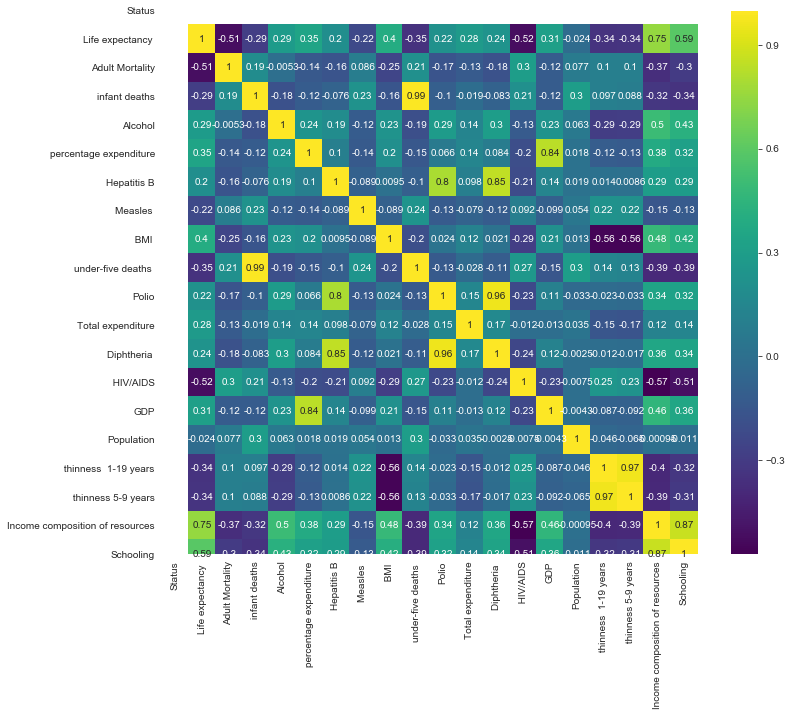

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(X_clean.corr(),cmap='viridis',annot=True)

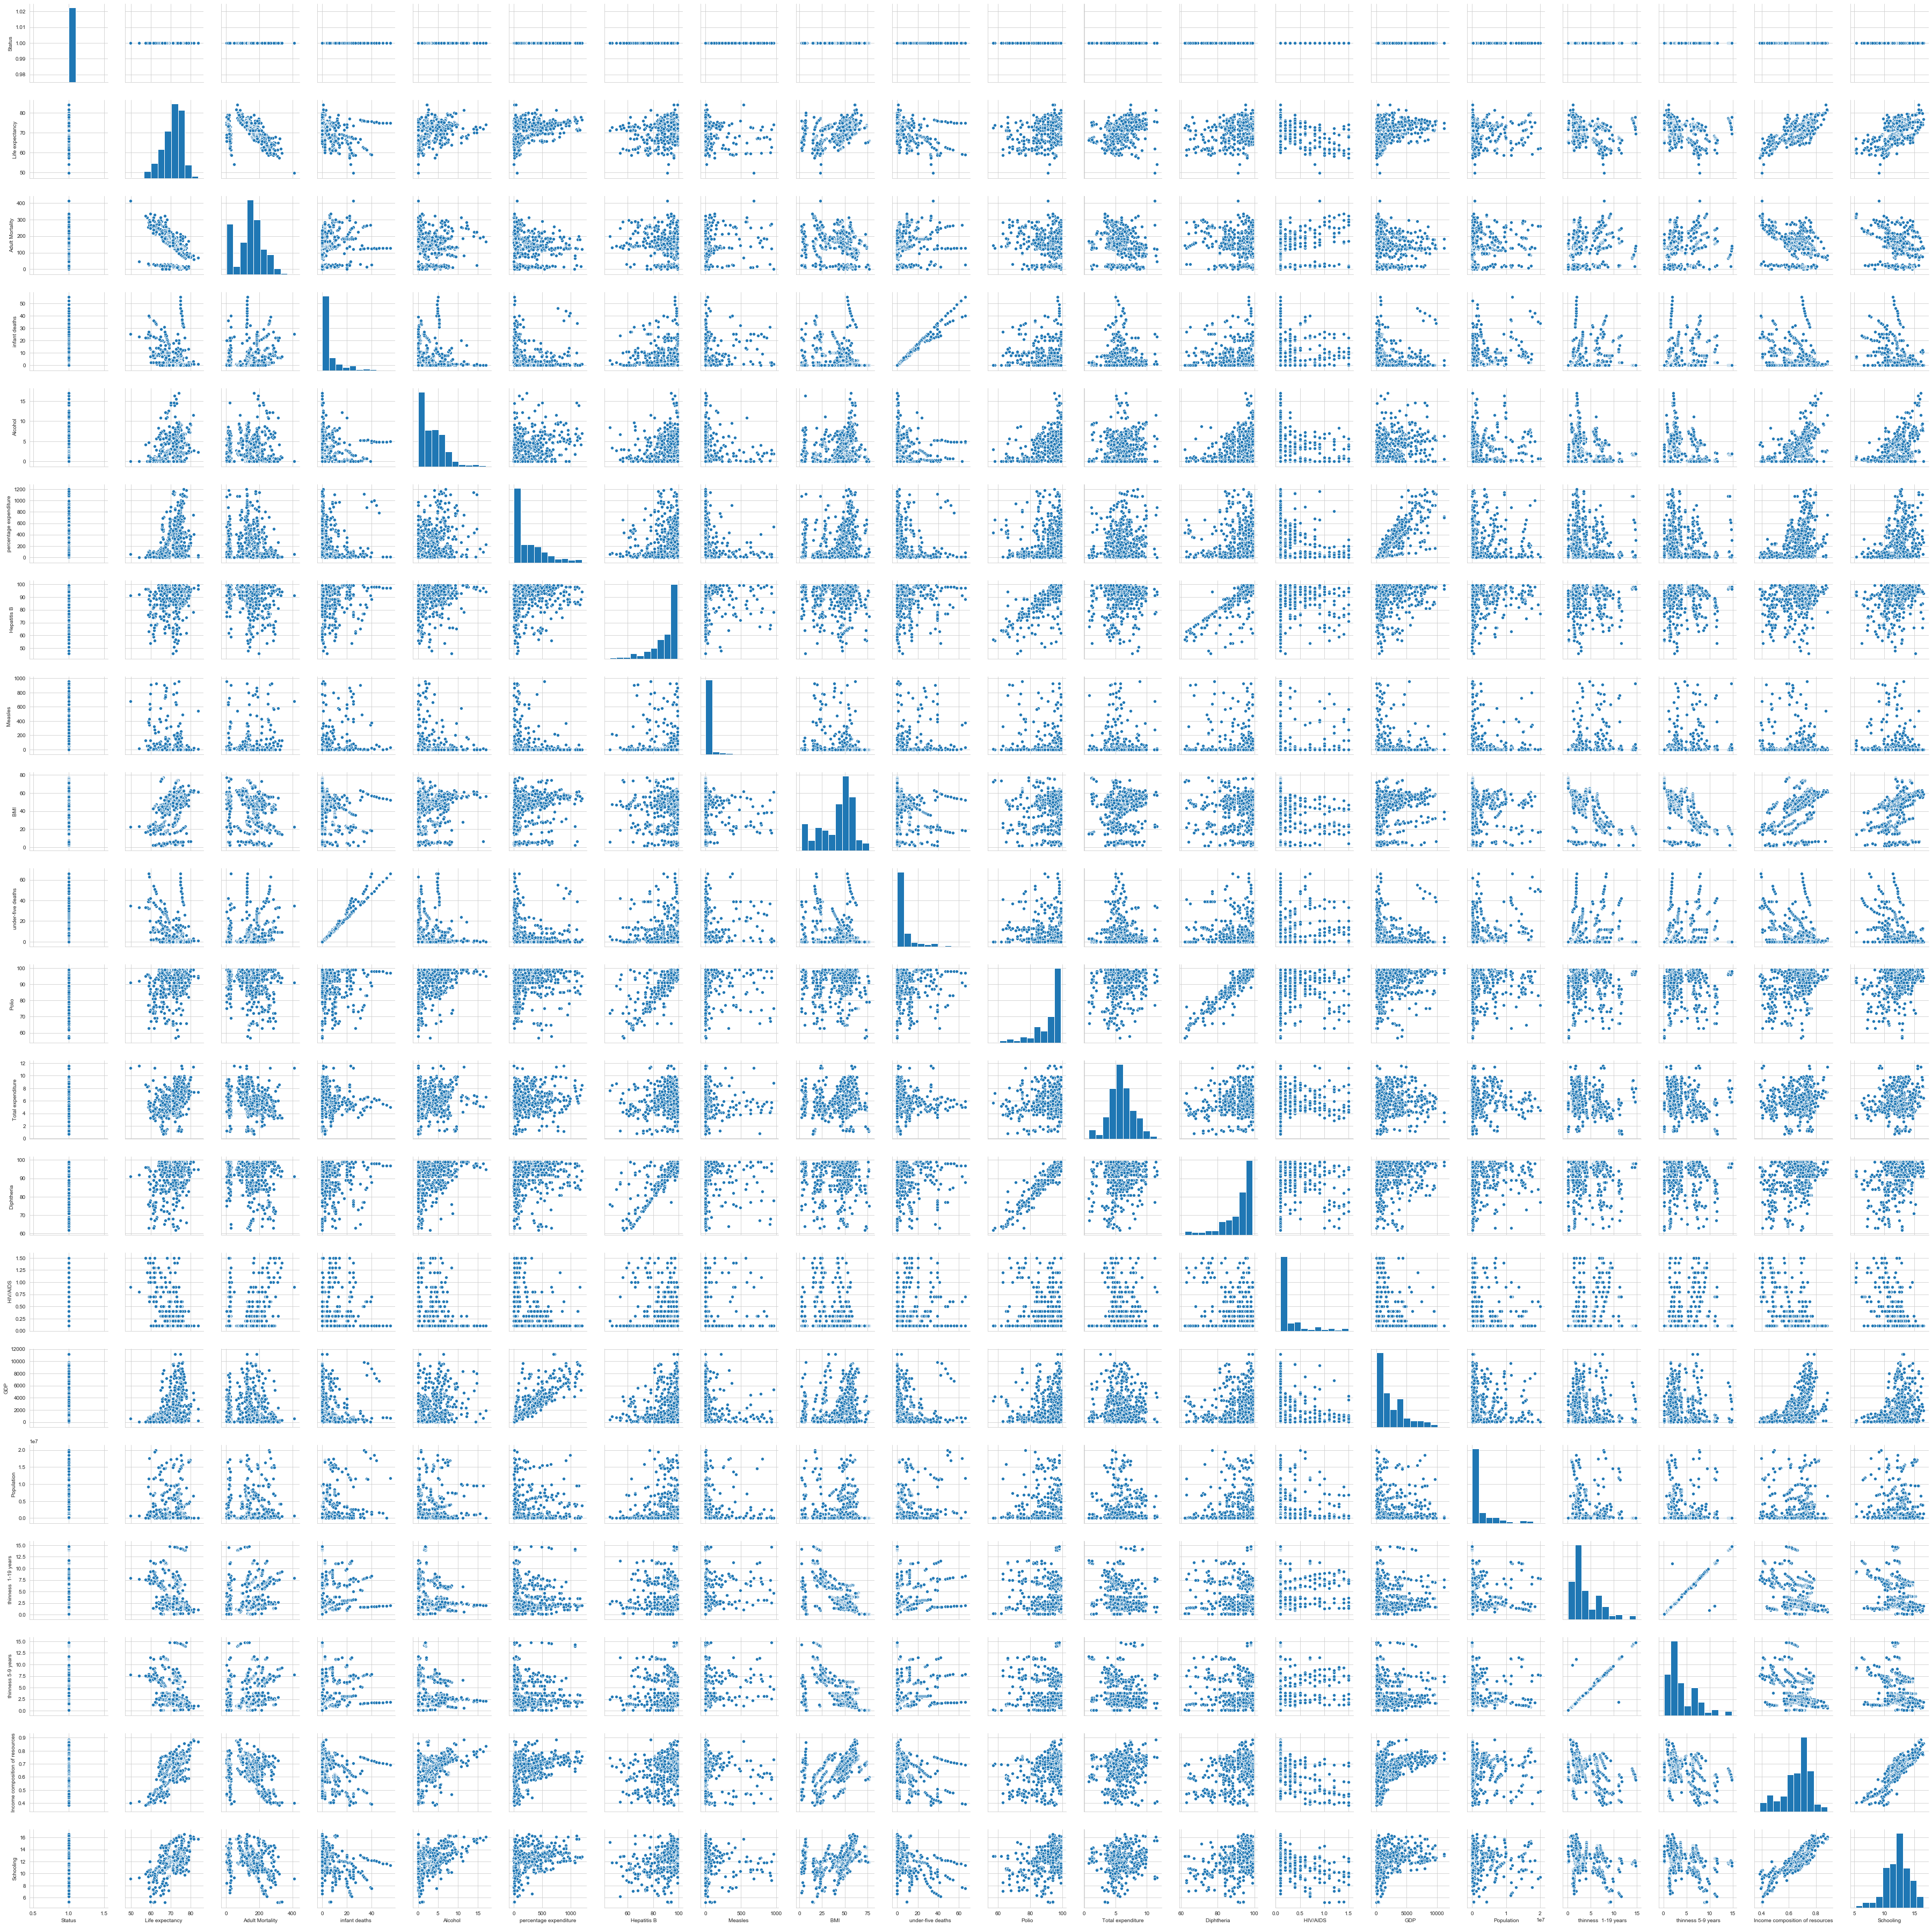

In [42]:
sns.pairplot(X_clean)